<a href="https://colab.research.google.com/github/marquinamaria/UCB_MDSv4_ML/blob/main/Sub%20Proyecto%202/P2_Proyecto%20-%20NLP%20Clasificacion%20Automatica%20de%20Tickets/MDSv4_ML_P2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificacion Automatica de Tickets con NLP

### Integrantes
* Maria Ines Marquina Guevara

## Descripcion del Problema

Debe crear un modelo que pueda clasificar las quejas (complaints) de los clientes en función de los productos/servicios. Al hacerlo, puede segregar estos tickets en sus categorías relevantes y, por lo tanto, ayudar en la resolución rápida del problema.

Realizará el modelado de temas en los datos <b>.json</b> proporcionados por la empresa. Dado que estos datos no están etiquetados, debe aplicar NMF para analizar patrones y clasificar los tickets en los siguientes cinco grupos según sus productos/servicios:

* Tarjetas de Credito / Tarjetas Prepagadas (Credit card / Prepaid Card)

* Servicios de Cuentas de Banco (Bank account services)

* Reportes de Robos (Theft/Dispute reporting)

* Prestamos Hipotecarios y Otros Prestamos (Mortgages/loans)

* Otros

Con la ayuda del modelado de temas, podrá asignar cada ticket a su respectivo departamento/categoría. Luego puede usar estos datos para entrenar cualquier modelo supervisado, como regresión logística, árbol de decisión o bosque aleatorio. Usando este modelo entrenado, puede clasificar cualquier nuevo ticket de soporte de quejas de clientes en su departamento correspondiente.

## Flujo de Trajajo a Realizar:

Debe realizar las siguientes ocho tareas principales para completar la tarea:

1. Data Loading

2. Text preprocessing

3. Exploratory Data Analysis (EDA)

4. Feature Extraction

5. Topic modeling

6. Model building using Supervised Learning

7. Model training and evaluation

8. Model inference

## Setup e Importacion de Librerias

In [ ]:
## SpaCy and en_core_web_sm installation
!pip install spacy

##run the following command in the console
#python -m spacy download en_core_web_sm

## Importing the necessary libraries

In [ ]:
import json
import numpy as np
import pandas as pd
import re, string

# Import NLTK libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Import Spacy libraries
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from pprint import pprint

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## Loading the data

Los datos están en formato JSON y necesitamos convertirlos a un dataframe.

In [ ]:
# Opening JSON file
# f = # Write the path to your data file and load it

# returns JSON object as
# a dictionary
# data = json.load(f)
# df=pd.json_normalize(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_file = "/content/drive/My Drive/Colab Notebooks/P2_Proyecto - NLP Clasificacion Automatica de Tickets/_data/complaints.json"
with open(data_file, 'r', encoding='utf-8') as file:
    data = json.load(file)
df = pd.json_normalize(data)

## Data preparation

In [ ]:
# Inspect the dataframe to understand the given data.
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [ ]:
df.dtypes

_index                                object
_type                                 object
_id                                   object
_score                               float64
_source.tags                          object
_source.zip_code                      object
_source.complaint_id                  object
_source.issue                         object
_source.date_received                 object
_source.state                         object
_source.consumer_disputed             object
_source.product                       object
_source.company_response              object
_source.company                       object
_source.submitted_via                 object
_source.date_sent_to_company          object
_source.company_public_response       object
_source.sub_product                   object
_source.timely                        object
_source.complaint_what_happened       object
_source.sub_issue                     object
_source.consumer_consent_provided     object
dtype: obj

In [ ]:
df.shape

(78313, 22)

In [ ]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [ ]:
#Assign new column names
df.columns = [col.replace('_source.', '') for col in df.columns]
df = df.rename(columns={ "complaint_what_happened": "complaint", "_index": "index", "_type": "type", "_score": "score", "_id": "id" })
df.columns

Index(['index', 'type', 'id', 'score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely', 'complaint',
       'sub_issue', 'consumer_consent_provided'],
      dtype='object')

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 22)


In [ ]:
df.count()

index                        78313
type                         78313
id                           78313
score                        78313
tags                         10900
zip_code                     71556
complaint_id                 78313
issue                        78313
date_received                78313
state                        76322
consumer_disputed            78313
product                      78313
company_response             78313
company                      78313
submitted_via                78313
date_sent_to_company         78313
company_public_response          4
sub_product                  67742
timely                       78313
complaint                    78313
sub_issue                    32016
consumer_consent_provided    77305
dtype: int64

In [ ]:
print(df.isnull().sum())

index                            0
type                             0
id                               0
score                            0
tags                         67413
zip_code                      6757
complaint_id                     0
issue                            0
date_received                    0
state                         1991
consumer_disputed                0
product                          0
company_response                 0
company                          0
submitted_via                    0
date_sent_to_company             0
company_public_response      78309
sub_product                  10571
timely                           0
complaint                        0
sub_issue                    46297
consumer_consent_provided     1008
dtype: int64


In [ ]:
df['complaint'].describe()

count     78313
unique    20931
top            
freq      57241
Name: complaint, dtype: object

In [ ]:
df['complaint'].isna().sum()

0

In [ ]:
df['complaint'].str.strip().eq('').sum()

57241

In [ ]:
#Assign nan in place of blanks in the complaints column
df['complaint'].replace('', np.nan, inplace=True)

In [ ]:
df['complaint'].str.strip().eq('').sum()

0

In [ ]:
df['complaint'].isna().sum()

57241

In [ ]:
df['complaint'].describe()

count                                                 21072
unique                                                20930
top       Chase has violated 15 USC 1692 by continuing c...
freq                                                     11
Name: complaint, dtype: object

In [ ]:
#Remove all rows where complaints column is nan
df.dropna(subset=['complaint'], inplace=True)

In [ ]:
df['complaint'].isna().sum()

0

## Prepare the text for topic modeling

Una vez que haya eliminado todas las quejas en blanco, debe:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers

Una vez que haya realizado estas operaciones de limpieza, debe realizar lo siguiente:

* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [ ]:
# Write your function here to clean the text and remove all the unnecessary elements.
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = ' '.join(text.split())
    return text

In [ ]:
# Write your function to Lemmatize the texts
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints
df_clean = df[['complaint']]
df_clean['lemmatized_complaint'] = (df['complaint'].apply(clean_text)).apply(lemmatize_text)

In [ ]:
df_clean

,complaint,lemmatized_complaint
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and i apprec...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgrade my xxxx xxxx card in and be tell by ...
10,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent app...
11,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket i come...
14,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...
...,...,...
78303,After being a Chase Card customer for well ove...,after be a chase card customer for well over a...
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",on wednesday xxxxxxxx i call chas my xxxx xxxx...
78310,I am not familiar with XXXX pay and did not un...,i be not familiar with xxxx pay and do not und...
78311,I have had flawless credit for 30 yrs. I've ha...,i have have flawless credit for yrs ive have c...


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#Write your function to extract the POS tags

is_noun = lambda pos: pos[:2] == 'NN'

def pos_tag(text):
    tokenized = nltk.word_tokenize(text)
    filtered_words = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(filtered_words)

df_clean["complaint_POS_removed"] =  df_clean['lemmatized_complaint'].apply(pos_tag) #this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].


In [ ]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaint,lemmatized_complaint,complaint_POS_removed
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and i apprec...,morning name xxxx stop bank cardmember service...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgrade my xxxx xxxx card in and be tell by ...,i card agent upgrade date agent information or...
10,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent app...,card report application identity consent servi...
11,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket i come...,try book xxxx ticket i offer ticket card i inf...
14,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,son deposit chase account fund bank account mo...
...,...,...,...
78303,After being a Chase Card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitations credit card...
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",on wednesday xxxxxxxx i call chas my xxxx xxxx...,xxxxxxxx i call chas xxxx visa credit card pro...
78310,I am not familiar with XXXX pay and did not un...,i be not familiar with xxxx pay and do not und...,pay risk provide consumers bank app i chase ye...
78311,I have had flawless credit for 30 yrs. I've ha...,i have have flawless credit for yrs ive have c...,i credit credit card chase freedom xxxx proble...


## Exploratory data analysis to get familiar with the data.

Escriba el código en esta tarea para realizar lo siguiente:

* Visualiza los datos según la longitud del carácteres 'Complaint'
* Usando una nube de palabras, encuentre las top 40 palabras más frecuentes de todos los artículos después de procesar el texto
* Encuentre los mejores unigramas, bigramas y trigramas por frecuencia entre todas las quejas después de procesar el texto. '

In [ ]:
# Calculate the character lengths of each complaint and store them in a new column
df_clean['complaint_length'] = df_clean['complaint'].apply(len)

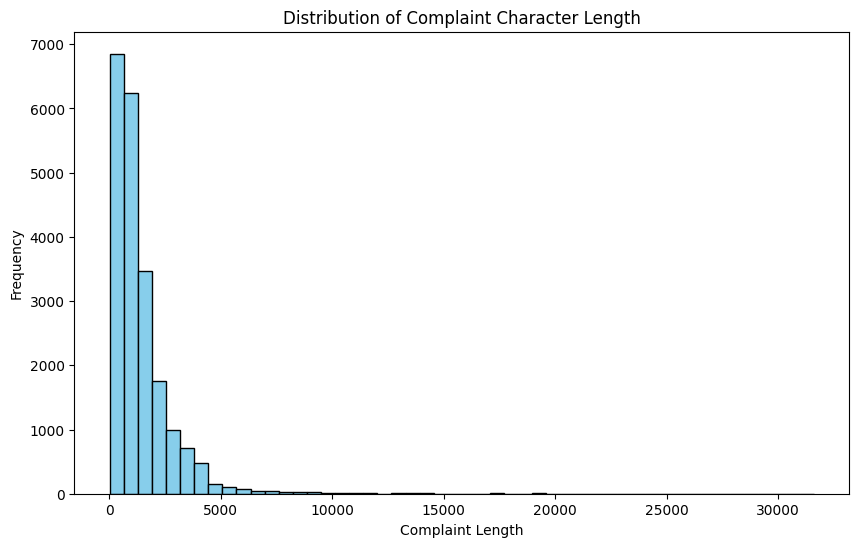

In [ ]:
# Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=(10, 6))
plt.hist(df_clean['complaint_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Complaint Character Length')
plt.xlabel('Complaint Length')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='complaint_length'>

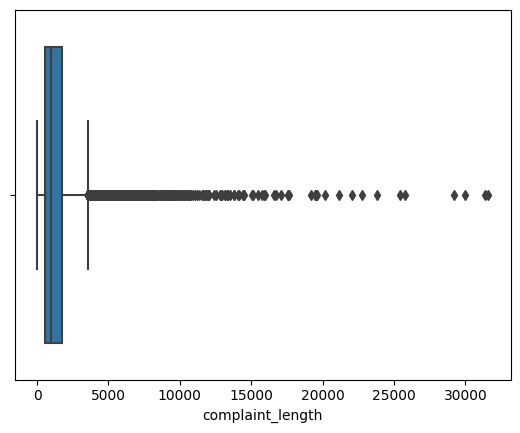

In [ ]:
sns.boxplot(x=df_clean['complaint_length'])

#### Find the top 40 words by frequency among all the articles after processing the text.

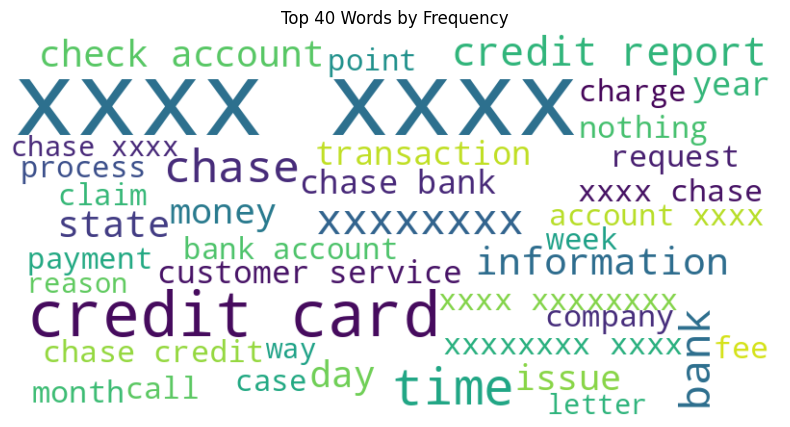

In [ ]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud

# Combine all processed text into a single string
all_text = ' '.join(df_clean['complaint_POS_removed'])

# Create a word frequency count
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(all_text)

# Create and display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words by Frequency')
plt.show()

In [ ]:
df_clean[df_clean['complaint_POS_removed'].str.contains('-PRON-')]

,complaint,lemmatized_complaint,complaint_POS_removed,complaint_length


In [ ]:
#Removing -PRON- from the text corpus
df_clean['complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [ ]:
from collections import Counter

all_complaints = ' '.join(df_clean['complaint_clean'])
tokens = all_complaints.split()
word_frequencies = Counter(tokens)

In [ ]:
# Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean).
top_30_unigrams = word_frequencies.most_common(30)
top_30_unigrams_df = pd.DataFrame(top_30_unigrams, columns=['Unigram', 'Frequency'])
print(top_30_unigrams_df)

        Unigram  Frequency
0          xxxx     149709
1             i     119260
2         chase      49478
3       account      47516
4        credit      34169
5          bank      30049
6          card      29299
7      xxxxxxxx      22569
8          time      16113
9         check      14862
10       charge      14819
11      payment      13964
12        money      11945
13         loan      11003
14         call      10988
15       report      10660
16        state      10061
17       letter       9670
18  information       9644
19          fee       8688
20       number       8621
21       amount       8392
22     mortgage       8200
23      service       8010
24        claim       7845
25      balance       7761
26        phone       7719
27      company       7630
28         days       7465
29     payments       7203


In [ ]:
# Print the top 10 words in the unigram frequency
top_10_unigrams = word_frequencies.most_common(10)
top_10_unigrams_df = pd.DataFrame(top_10_unigrams, columns=['Unigram', 'Frequency'])
print(top_10_unigrams_df)

    Unigram  Frequency
0      xxxx     149709
1         i     119260
2     chase      49478
3   account      47516
4    credit      34169
5      bank      30049
6      card      29299
7  xxxxxxxx      22569
8      time      16113
9     check      14862


In [ ]:
# Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean).
from nltk import bigrams
all_complaints = ' '.join(df_clean['complaint_clean'])
tokens = all_complaints.split()
bi_grams = list(bigrams(tokens))

In [ ]:
bigram_frequencies = Counter(bi_grams)
top_30_bigrams = bigram_frequencies.most_common(30)
top_30_bigrams_df = pd.DataFrame(top_30_bigrams, columns=['Bigram', 'Frequency'])
print(top_30_bigrams_df)

                  Bigram  Frequency
0           (xxxx, xxxx)      67627
1         (credit, card)      12765
2              (xxxx, i)       9375
3             (i, chase)       6161
4              (i, xxxx)       5429
5          (xxxxxxxx, i)       5306
6           (account, i)       5035
7       (credit, report)       4951
8                 (i, i)       4803
9       (check, account)       4279
10          (i, account)       3348
11           (i, credit)       3343
12             (card, i)       3324
13         (chase, bank)       3231
14             (i, bank)       3106
15   (customer, service)       3060
16      (xxxx, xxxxxxxx)       2847
17      (xxxxxxxx, xxxx)       2819
18       (chase, credit)       2812
19         (xxxx, chase)       2789
20       (account, xxxx)       2697
21       (bank, account)       2635
22            (chase, i)       2519
23             (i, call)       2500
24         (chase, xxxx)       2456
25      (account, chase)       2149
26      (chase, account)    

In [ ]:
# Print the top 10 words in the bigram frequency
top_10_bigrams = top_30_bigrams[:10]
top_10_bigrams_df = pd.DataFrame(top_10_bigrams, columns=['Bigram', 'Frequency'])
print("Top 10 Bigram Frequencies:")
print(top_10_bigrams_df)

Top 10 Bigram Frequencies:
             Bigram  Frequency
0      (xxxx, xxxx)      67627
1    (credit, card)      12765
2         (xxxx, i)       9375
3        (i, chase)       6161
4         (i, xxxx)       5429
5     (xxxxxxxx, i)       5306
6      (account, i)       5035
7  (credit, report)       4951
8            (i, i)       4803
9  (check, account)       4279


In [ ]:
# Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean).
from nltk import trigrams

tri_grams = list(trigrams(tokens))
trigram_frequencies = Counter(tri_grams)
top_30_trigrams = trigram_frequencies.most_common(30)
top_30_trigrams_df = pd.DataFrame(top_30_trigrams, columns=['Trigram', 'Frequency'])
print(top_30_trigrams_df)

                           Trigram  Frequency
0               (xxxx, xxxx, xxxx)      34177
1                  (xxxx, xxxx, i)       3656
2            (chase, credit, card)       1941
3                  (i, xxxx, xxxx)       1788
4                (i, credit, card)       1498
5           (xxxxxxxx, xxxx, xxxx)       1429
6           (xxxx, xxxx, xxxxxxxx)       1300
7              (xxxx, xxxx, chase)       1171
8                (credit, card, i)       1114
9            (account, xxxx, xxxx)       1035
10         (credit, card, company)        973
11              (bank, xxxx, xxxx)        971
12             (chase, xxxx, xxxx)        956
13         (credit, card, account)        955
14            (xxxx, credit, card)        924
15          (xxxx, xxxxxxxx, xxxx)        920
16           (xxxx, xxxx, account)        761
17            (xxxx, xxxx, credit)        739
18              (xxxx, xxxx, bank)        723
19                 (xxxx, i, xxxx)        695
20              (name, xxxx, xxxx)

In [ ]:
# Print the top 10 words in the trigram frequency
top_10_trigrams = top_30_trigrams[:10]
top_10_trigrams_df = pd.DataFrame(top_10_trigrams, columns=['Trigram', 'Frequency'])
print("Top 10 Trigram Frequencies:")
print(top_10_trigrams_df)

Top 10 Trigram Frequencies:
                  Trigram  Frequency
0      (xxxx, xxxx, xxxx)      34177
1         (xxxx, xxxx, i)       3656
2   (chase, credit, card)       1941
3         (i, xxxx, xxxx)       1788
4       (i, credit, card)       1498
5  (xxxxxxxx, xxxx, xxxx)       1429
6  (xxxx, xxxx, xxxxxxxx)       1300
7     (xxxx, xxxx, chase)       1171
8       (credit, card, i)       1114
9   (account, xxxx, xxxx)       1035


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [ ]:
df_clean['complaint_clean'] = df_clean['complaint_clean'].str.replace('xxxx','')

In [ ]:
# All masked texts has been removed
df_clean.head(5)

,complaint,lemmatized_complaint,complaint_POS_removed,complaint_length,complaint_clean
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and i apprec...,morning name xxxx stop bank cardmember service...,486,morning name stop bank cardmember service ask...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgrade my xxxx xxxx card in and be tell by ...,i card agent upgrade date agent information or...,355,i card agent upgrade date agent information or...
10,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent app...,card report application identity consent servi...,224,card report application identity consent servi...
11,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket i come...,try book xxxx ticket i offer ticket card i inf...,1502,try book ticket i offer ticket card i informa...
14,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,son deposit chase account fund bank account mo...,477,son deposit chase account fund bank account mo...


## Feature Extraction
Convierta los textos sin procesar en una matriz de características TF-IDF

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [ ]:
# Write your code here to initialise the TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer with max_df and min_df parameters
# max_df: Ignore terms that appear in more than 95% of the complaints
# min_df: Ignore terms that appear in less than 2 complaints
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [ ]:
# Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
tfidf_vector = tfidf_vectorizer.fit_transform(df_clean['complaint_clean'])

In [ ]:
tfidf_vector.shape

(21072, 8150)

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
len(feature_names)

8150

In [ ]:
feature_names[1000:1005]

array(['buyers', 'buyout', 'bw', 'by', 'bye'], dtype=object)

In [ ]:
# tfidf_df = pd.DataFrame(tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# tfidf_df = tfidf_df.stack().reset_index()
# tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document', 'level_1': 'term', 'level_2': 'term'})
# tfidf_df.head(10)

In [ ]:
# find out the top 10 words with the highest tf–idf for every story
#tfidf_df.sort_values(by=['document', 'tfidf'], ascending=[True, False]).groupby(['document']).head(10)

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) es una técnica no supervisada, por lo que no hay etiquetas de temas en los que se entrenará el modelo. La forma en que funciona es que NMF descompone (o factoriza) vectores de alta dimensión en una representación de menor dimensión. Estos vectores de menor dimensión no son negativos, lo que también significa que sus coeficientes no son negativos.

En esta tarea tienes que realizar lo siguiente:

* Find the best number of clusters
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints
* Correct the labels if needed
* Map the clusters to topics/cluster names

* Encuentra el mejor número de clústeres
* Aplicar el mejor número para crear grupos de palabras
* Inspeccionar y validar la corrección de cada grupo frente a las quejas (Complaints)
* Corrija las etiquetas si es necesario
* Mapear el grupo de nombres de topicos/clusters

In [ ]:
# Find the best number of clusters

from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score
import numpy as np

# Initialize a range of cluster numbers to test
cluster_range = range(2, 11)  # Try different numbers of clusters

# Create an empty list to store silhouette scores
silhouette_scores = []

# Fit NMF for each cluster number and calculate silhouette score
for n_clusters in cluster_range:
    nmf = NMF(n_components=n_clusters, random_state=42)
    cluster_assignments = nmf.fit_transform(tfidf_vector)
    silhouette_avg = silhouette_score(cluster_assignments, np.argmax(cluster_assignments, axis=1))
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters with the highest silhouette score
best_n_clusters = cluster_range[np.argmax(silhouette_scores)]
print("Best Number of Clusters:", best_n_clusters)

Best Number of Clusters: 3


In [ ]:
# Apply NMF with the Best Number of Clusters:
nmf = NMF(n_components=best_n_clusters, random_state=42)
topic_weights = nmf.fit_transform(tfidf_vector)
topic_weights.shape

(21072, 3)

In [ ]:
# Get top keywords (words) that represent each topics
def get_topic(identifier, top_words=10):
    for topic_id, topic_word_probs in enumerate(nmf.components_):
        if topic_id == identifier:
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words - 1 : -1]]
            return " ".join(top_feature_names)

for i in range(best_n_clusters):
    print("Topic:", i, get_topic(i))

Topic: 0 account check bank money chase fund deposit branch fee claim
Topic: 1 credit card report charge chase company account dispute balance inquiry
Topic: 2 loan payment mortgage payments chase home modification interest time rate


In [ ]:
topic_id_topic_mapping = {}
for i in range(best_n_clusters):
    topic_id_topic_mapping[i] = get_topic(i)

print(topic_id_topic_mapping)

{0: 'account check bank money chase fund deposit branch fee claim', 1: 'credit card report charge chase company account dispute balance inquiry', 2: 'loan payment mortgage payments chase home modification interest time rate'}


In [ ]:
topic_to_doc_mapping = {}
topic_list = []
topic_names = []

for i in range(best_n_clusters):
    most_likely_topic = topic_weights[i].argmax()
    if most_likely_topic not in topic_to_doc_mapping:
        topic_to_doc_mapping[most_likely_topic] = []

    topic_to_doc_mapping[most_likely_topic].append(i)
    topic_list.append(most_likely_topic)
    topic_names.append(topic_id_topic_mapping[most_likely_topic])

In [ ]:
print(topic_list)

[0, 1, 1]


In [ ]:
print(topic_names)

['account check bank money chase fund deposit branch fee claim', 'credit card report charge chase company account dispute balance inquiry', 'credit card report charge chase company account dispute balance inquiry']


## Manual Topic Modeling
Debe adoptar el enfoque de prueba y error para encontrar la mejor cantidad de topicos para su modelo NMF.

El único parámetro que se requiere es el número de componentes, es decir, el número de topicos que queremos. Este es el paso más crucial en todo el proceso de modelado de topicos y afectará en gran medida la calidad de sus topicos finales.

In [ ]:
# Load your nmf_model with the n_components i.e 5
num_topics = 5 # write the value you want to test out

# keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40) # write your code here

In [ ]:
tfidf = nmf_model.fit(tfidf_vector)
len(tfidf.get_feature_names_out())

5

In [ ]:
# Print the Top15 words for each of the topics

# Get the feature names (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the top 15 words for each topic
n_top_words = 15  # Number of top words to display for each topic

for topic_idx, topic in enumerate(nmf_model.components_):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Topic 1: account, check, bank, money, fund, chase, deposit, branch, business, number, days, cash, claim, transfer, access
Topic 2: credit, card, report, account, inquiry, chase, inquiries, score, company, limit, information, debt, letter, application, bureaus
Topic 3: loan, mortgage, home, modification, chase, property, payments, time, letter, document, house, bank, foreclosure, years, sale
Topic 4: charge, card, chase, dispute, fraud, claim, purchase, merchant, fee, transaction, call, service, time, transactions, phone
Topic 5: payment, balance, payments, fee, interest, month, statement, amount, bill, pay, date, time, rate, account, auto


In [ ]:
# Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

# Get the topic assignments for each complaint
topic_assignments = np.argmax(nmf_model.transform(tfidf_vector), axis=1)

# Assign each complaint to the best topic (integer value)
df_clean['best_topic'] = topic_assignments
df_clean['best_topic']

1        0
2        1
10       1
11       1
14       0
        ..
78303    1
78309    3
78310    3
78311    4
78312    4
Name: best_topic, Length: 21072, dtype: int64

In [ ]:
# Assign the best topic to each of the cmplaints in Topic Column

df_clean['topic'] = df_clean['best_topic'] # write your code to assign topics to each rows.
df_clean['topic']

1        0
2        1
10       1
11       1
14       0
        ..
78303    1
78309    3
78310    3
78311    4
78312    4
Name: topic, Length: 21072, dtype: int64

In [ ]:
df_clean.head()

,complaint,lemmatized_complaint,complaint_POS_removed,complaint_length,complaint_clean,best_topic,topic
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and i apprec...,morning name xxxx stop bank cardmember service...,486,morning name stop bank cardmember service ask...,0,0
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgrade my xxxx xxxx card in and be tell by ...,i card agent upgrade date agent information or...,355,i card agent upgrade date agent information or...,1,1
10,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent app...,card report application identity consent servi...,224,card report application identity consent servi...,1,1
11,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket i come...,try book xxxx ticket i offer ticket card i inf...,1502,try book ticket i offer ticket card i informa...,1,1
14,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,son deposit chase account fund bank account mo...,477,son deposit chase account fund bank account mo...,0,0


In [ ]:
# Print the first 5 Complaint for each of the Topics
df_clean=df_clean.groupby('topic').head(5)
df_clean.sort_values('topic')

,complaint,lemmatized_complaint,complaint_POS_removed,complaint_length,complaint_clean,best_topic,topic
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and i apprec...,morning name xxxx stop bank cardmember service...,486,morning name stop bank cardmember service ask...,0,0
14,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,son deposit chase account fund bank account mo...,477,son deposit chase account fund bank account mo...,0,0
17,With out notice J.P. Morgan Chase restricted m...,with out notice jp morgan chase restrict my ac...,jp chase account debit card tuesday thursday i...,2277,jp chase account debit card tuesday thursday i...,0,0
24,mishandling of this account by Chase auto and ...,mishandle of this account by chase auto and xxxx,mishandle account auto xxxx,51,mishandle account auto,0,0
27,I opened an account with chase bank on XXXX an...,i open an account with chase bank on xxxx and ...,i account bank xxxx code bonus i xxxxxxxx term...,413,i account bank code bonus i term everything ...,0,0
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgrade my xxxx xxxx card in and be tell by ...,i card agent upgrade date agent information or...,355,i card agent upgrade date agent information or...,1,1
10,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent app...,card report application identity consent servi...,224,card report application identity consent servi...,1,1
11,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket i come...,try book xxxx ticket i offer ticket card i inf...,1502,try book ticket i offer ticket card i informa...,1,1
15,Can you please remove inquiry,can you please remove inquiry,inquiry,29,inquiry,1,1
23,I have a Chase credit card which is incorrectl...,i have a chase credit card which be incorrectl...,i chase credit card data credit report company...,129,i chase credit card data credit report company...,1,1


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [ ]:
# Create the dictionary of Topic names and Topics

topic_names = {
    0:'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Theft/Dispute Reporting',
    3: 'Mortgage/Loan',
    4: 'Others' }

#Replace Topics with Topic Names
df_clean['topic'] = df_clean['topic'].map(topic_names)

In [ ]:
df_clean

,complaint,lemmatized_complaint,complaint_POS_removed,complaint_length,complaint_clean,best_topic,topic
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and i apprec...,morning name xxxx stop bank cardmember service...,486,morning name stop bank cardmember service ask...,0,Bank Account services
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgrade my xxxx xxxx card in and be tell by ...,i card agent upgrade date agent information or...,355,i card agent upgrade date agent information or...,1,Credit card or prepaid card
10,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent app...,card report application identity consent servi...,224,card report application identity consent servi...,1,Credit card or prepaid card
11,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket i come...,try book xxxx ticket i offer ticket card i inf...,1502,try book ticket i offer ticket card i informa...,1,Credit card or prepaid card
14,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,son deposit chase account fund bank account mo...,477,son deposit chase account fund bank account mo...,0,Bank Account services
15,Can you please remove inquiry,can you please remove inquiry,inquiry,29,inquiry,1,Credit card or prepaid card
17,With out notice J.P. Morgan Chase restricted m...,with out notice jp morgan chase restrict my ac...,jp chase account debit card tuesday thursday i...,2277,jp chase account debit card tuesday thursday i...,0,Bank Account services
20,"During the summer months, I experience a decli...",during the summer months i experience a declin...,summer months income employment month payment ...,1396,summer months income employment month payment ...,4,Others
21,"On XXXX XX/XX/2019, I made a {$300.00} payment...",on xxxx i make a payment to an online retailer...,xxxx i payment online retailer use pay xxxx ch...,3541,i payment online retailer use pay chase webs...,3,Mortgage/Loan
23,I have a Chase credit card which is incorrectl...,i have a chase credit card which be incorrectl...,i chase credit card data credit report company...,129,i chase credit card data credit report company...,1,Credit card or prepaid card


## Supervised model to predict any new complaints to the relevant Topics.

Hasta ahora ha creado el modelo para crear los temas para cada queja. Entonces, en la siguiente sección, los utilizará para clasificar cualquier queja nueva.

Dado que utilizará la técnica de aprendizaje supervisado, tenemos que convertir los nombres de los temas en números (las matrices numpy solo entienden los números)

In [ ]:
# Create the dictionary of Topic names and Topics

topic_names = {
    'Bank Account services': 0,
    'Credit card or prepaid card':1 ,
    'Theft/Dispute Reporting': 2,
    'Mortgage/Loan': 3,
    'Others': 4 }
# Replace Topics with Topic Names
df_clean['topic'] = df_clean['topic'].map(topic_names)

In [ ]:
df_clean

,complaint,lemmatized_complaint,complaint_POS_removed,complaint_length,complaint_clean,best_topic,topic
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and i apprec...,morning name xxxx stop bank cardmember service...,486,morning name stop bank cardmember service ask...,0,0
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgrade my xxxx xxxx card in and be tell by ...,i card agent upgrade date agent information or...,355,i card agent upgrade date agent information or...,1,1
10,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent app...,card report application identity consent servi...,224,card report application identity consent servi...,1,1
11,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket i come...,try book xxxx ticket i offer ticket card i inf...,1502,try book ticket i offer ticket card i informa...,1,1
14,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,son deposit chase account fund bank account mo...,477,son deposit chase account fund bank account mo...,0,0
15,Can you please remove inquiry,can you please remove inquiry,inquiry,29,inquiry,1,1
17,With out notice J.P. Morgan Chase restricted m...,with out notice jp morgan chase restrict my ac...,jp chase account debit card tuesday thursday i...,2277,jp chase account debit card tuesday thursday i...,0,0
20,"During the summer months, I experience a decli...",during the summer months i experience a declin...,summer months income employment month payment ...,1396,summer months income employment month payment ...,4,4
21,"On XXXX XX/XX/2019, I made a {$300.00} payment...",on xxxx i make a payment to an online retailer...,xxxx i payment online retailer use pay xxxx ch...,3541,i payment online retailer use pay chase webs...,3,3
23,I have a Chase credit card which is incorrectl...,i have a chase credit card which be incorrectl...,i chase credit card data credit report company...,129,i chase credit card data credit report company...,1,1


In [ ]:
# Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean[['complaint', 'topic']]

In [ ]:
training_data

,complaint,topic
1,Good morning my name is XXXX XXXX and I apprec...,0
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,1
10,Chase Card was reported on XX/XX/2019. However...,1
11,"On XX/XX/2018, while trying to book a XXXX XX...",1
14,my grand son give me check for {$1600.00} i de...,0
15,Can you please remove inquiry,1
17,With out notice J.P. Morgan Chase restricted m...,0
20,"During the summer months, I experience a decli...",4
21,"On XXXX XX/XX/2019, I made a {$300.00} payment...",3
23,I have a Chase credit card which is incorrectl...,1


#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [ ]:
# Write your code to get the Vector count
# Step 1: Create the vector counts using Count Vectorizer
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(training_data['complaint'])


# Write your code here to transform the word vector to tf-idf
# Step 2: Transform the word vector to TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [ ]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split

# Write your code here to build any 3 models and evaluate them using the required metrics
result_dict = {}

def compare_results():
    for key in result_dict:
        print('Regression', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()

def plot_Y(y_pred, y_test, y_col_name):
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel(y_col_name)
    plt.legend()
    plt.show()

def plot_scatter(x_test, y_test, y_pred):
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.scatter(x_test, y_test)
    plt.ylabel(x_test, y_pred, 'r')
    plt.legend('Predicted', 'Observed')
    plt.show()

def build_model(regresion_fn,
                X,
                Y,
                y_col_name='topic',
                test_frac=0.3,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):

    if preprocess_fn is not None:
        X = preprocess_fn(X)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    model = regresion_fn.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Training score', model.score(x_train, y_train))
    print('Test score', r2_score(y_test, y_pred))
    print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
    print("Classification Report\n", classification_report(y_test, y_pred))

    if show_plot_Y:
        plot_Y(y_pred, y_test, y_col_name)

    if show_plot_scatter:
        plot_scatter(x_test, y_test, y_pred)

    return {
        'training_score': model.score(x_train, y_train),
        'test_score': r2_score(y_test, y_pred)
    }

Training score 0.8823529411764706
Test score 0.12568306010928965
Confusion Matrix
 [[0 0 2 0 0]
 [0 0 2 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 2 1 0]]
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       3.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00       8.0
weighted avg       0.00      0.00      0.00       8.0



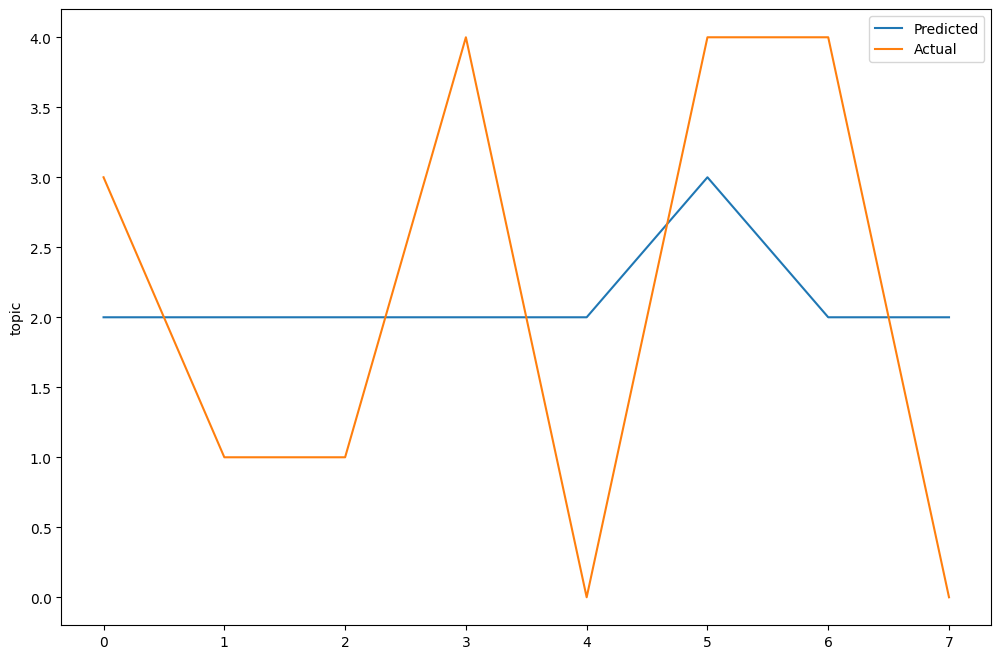

In [ ]:
result_dict['LogisticRegression'] = build_model(
    LogisticRegression(random_state=42),
    X_tfidf,
    training_data['topic'],
    show_plot_Y=True
)

Training score 1.0
Test score 0.6129032258064516
Confusion Matrix
 [[1 0 0 0 0]
 [1 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 1 0]
 [0 0 0 0 2]]
Classification Report
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.33      0.50      0.40         2
           2       0.00      0.00      0.00         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2

    accuracy                           0.62         8
   macro avg       0.57      0.60      0.55         8
weighted avg       0.65      0.62      0.60         8



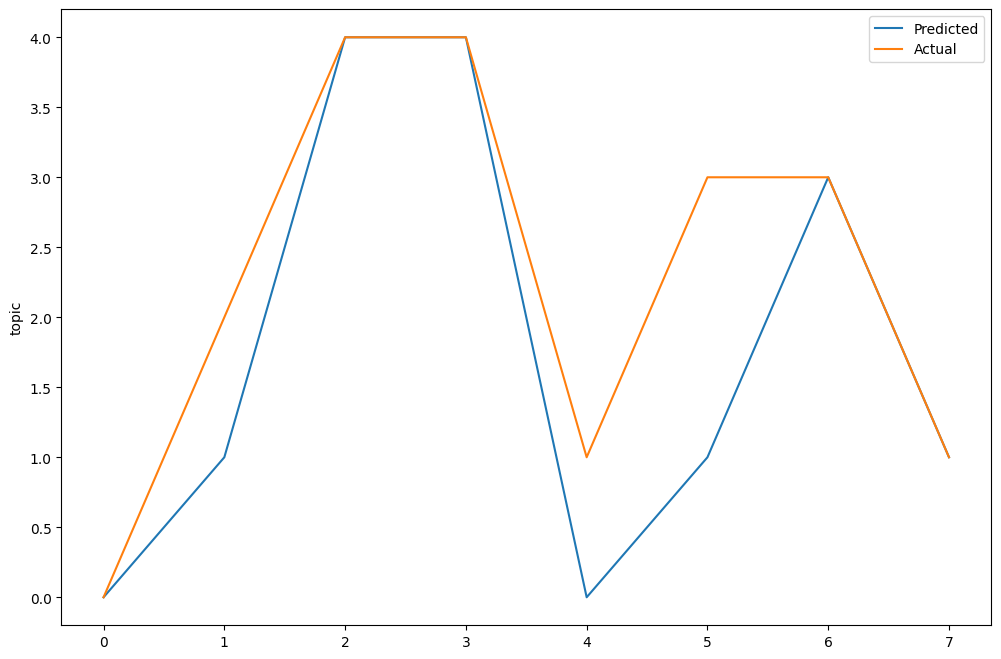

In [ ]:
result_dict['DecisionTreeClassifier'] = build_model(
    DecisionTreeClassifier(random_state=42),
    X_tfidf,
    training_data['topic'],
    show_plot_Y=True
)

Training score 1.0
Test score -1.4504504504504503
Confusion Matrix
 [[0 0 1 0 1]
 [1 1 0 0 0]
 [1 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]]
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.50      0.67         2
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1

    accuracy                           0.38         8
   macro avg       0.40      0.40      0.37         8
weighted avg       0.44      0.38      0.37         8



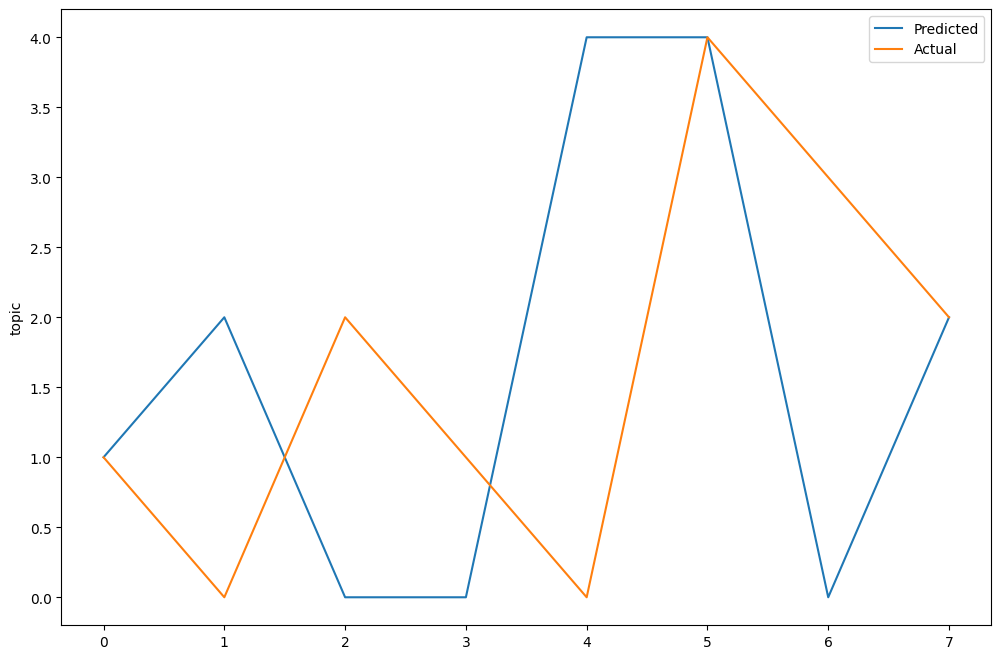

In [ ]:
result_dict['RandomForestClassifier'] = build_model(
    RandomForestClassifier(random_state=42),
    X_tfidf,
    training_data['topic'],
    show_plot_Y=True
)